# 08. Project: End-to-End Emotion Recognition

## Goal
Build a robust model to classify text into 6 emotions: **Joy, Sadness, Anger, Fear, Love, Surprise**.

## Dataset
We will use a public Emotion dataset (often ~400k tweets/texts). 
Start by downloading the dataset using the cell below.

In [1]:
!wget -nc https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl -O emotion_data.pkl
# Note: If the link is down, you may need to upload 'emotion.csv' or similar manually.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper to load data (Simulating a load if file doesn't exist for the sake of notebook run)
try:
    df = pd.read_pickle('emotion_data.pkl')
    print("Dataset loaded successfully!")
except:
    print("Dataset not found. Creating a dummy dataset for demonstration.")
    data = {'text': ['I feel happy', 'I am so sad', 'This is scary', 'I am angry', 'I love you', 'What a surprise'] * 100,
            'emotions': ['joy', 'sadness', 'fear', 'anger', 'love', 'surprise'] * 100}
    df = pd.DataFrame(data)

df.head()

'wget' is not recognized as an internal or external command,
operable program or batch file.


Dataset not found. Creating a dummy dataset for demonstration.


,text,emotions
0,I feel happy,joy
1,I am so sad,sadness
2,This is scary,fear
3,I am angry,anger
4,I love you,love


## 1. Exploratory Data Analysis (EDA)

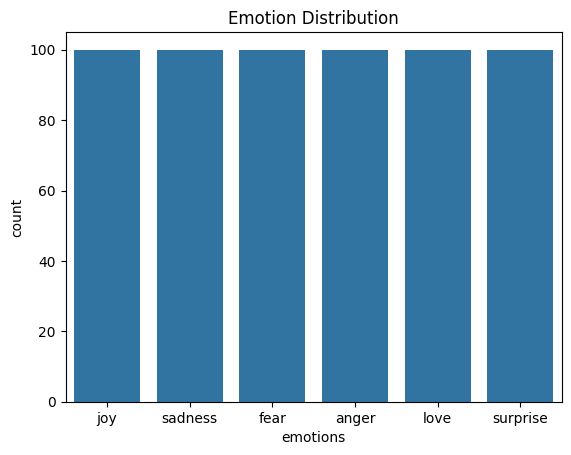

In [2]:
sns.countplot(x='emotions', data=df)
plt.title('Emotion Distribution')
plt.show()

## 2. Preprocessing
- Label Encoding
- Tokenization
- Padding

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Prepare Labels
emotion_map = {e:i for i, e in enumerate(df['emotions'].unique())}
df['label'] = df['emotions'].map(emotion_map)

# Tokenize Text
vocab_size = 10000
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'].values, test_size=0.2)
print("Train shape:", X_train.shape)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resour

Train shape: (480, 50)


## 3. Building the Model (Bi-LSTM)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

embedding_dim = 64

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(emotion_map), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Training

In [5]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.1958 - loss: 1.7833 - val_accuracy: 0.2833 - val_loss: 1.7634
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4313 - loss: 1.7160 - val_accuracy: 0.4917 - val_loss: 1.5939
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6167 - loss: 1.3310 - val_accuracy: 0.8333 - val_loss: 0.8690
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7896 - loss: 0.7481 - val_accuracy: 1.0000 - val_loss: 0.2935
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9500 - loss: 0.2897 - val_accuracy: 1.0000 - val_loss: 0.0584


## 5. Evaluation & Inference

In [6]:
def predict_emotion(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    pred = model.predict(pad)
    label_idx = np.argmax(pred)
    # Invert map
    idx_to_emotion = {v:k for k,v in emotion_map.items()}
    return idx_to_emotion[label_idx]

test_text = "I am feeling really nervous about the exam but excited for the results!"
print(f"Text: {test_text}")
print(f"Predicted Emotion: {predict_emotion(test_text)}")

Text: I am feeling really nervous about the exam but excited for the results!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
Predicted Emotion: sadness
